## **Genetic Algorithm Task**

**Task:** Solving the Traveling Salesman Problem Using Genetic Algorithm

**Description:** Write a Python program that uses a genetic algorithm to solve the Traveling Salesman Problem (TSP) for a small set of cities. The goal is to find the shortest route that visits each city exactly once and returns to the starting city.

**Steps:**
1. Define a set of cities and their coordinates.
2. Generate an initial population of random routes (order of cities).
3. Implement a fitness function to calculate the total distance of a route.
4. Perform selection, crossover, and mutation operations to create a new generation of routes.
5. Repeat the process for a certain number of generations.
6. Identify the best route in the final generation as the solution.

**Optional Extensions:**
- Experiment with different population sizes, mutation rates, and selection methods.


Best Route: [1, 4, 2, 3, 0]
Total Distance: 26.654273943681524


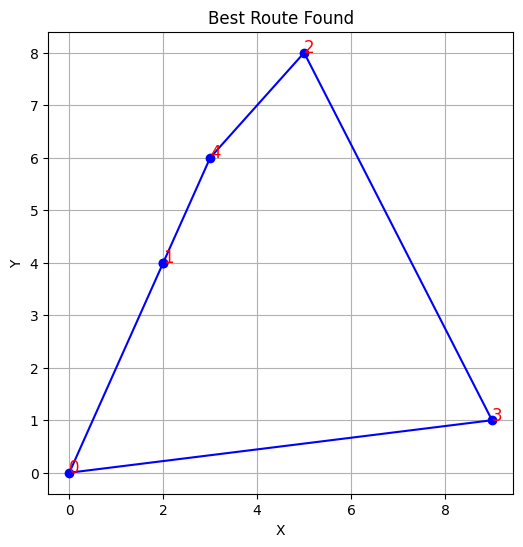

In [4]:
import random
import math
import matplotlib.pyplot as plt

def distance(city1, city2):
    """
    Calculates the Euclidean distance between two cities.

    Args:
        city1 (tuple): Coordinates of the first city (x, y).
        city2 (tuple): Coordinates of the second city (x, y).

    Returns:
        float: Euclidean distance between the two cities.
    """
    x1, y1 = city1
    x2, y2 = city2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def total_distance(route, cities):
    """
    Calculates the total distance of a route that visits cities in order.

    Args:
        route (list): List of city indices in the route.
        cities (list): List of city coordinates.

    Returns:
        float: Total distance of the route.
    """


    total = 0
    for i in range(len(route)):
        city1 = cities[route[i]]
        city2 = cities[route[(i + 1) % len(route)]]  # return to start
        total += distance(city1, city2)
    return total

def generate_initial_population(num_routes, num_cities):
    """
    Generates an initial population of random routes.

    Args:
        num_routes (int): Number of routes in the population.
        num_cities (int): Number of cities in the route.

    Returns:
        list: List of random routes (lists of city indices).
    """


    initial_population = []
    for _ in range(num_routes):
        route = list(range(num_cities))
        random.shuffle(route)
        initial_population.append(route)
    return initial_population


def selection(population, cities):
    """
    Selects individuals from the population for reproduction using tournament selection.

    Args:
        population (list): List of routes (lists of city indices).
        cities (list): List of city coordinates.

    Returns:
        list: List of selected routes for reproduction.
    """

    selected_routes = []
    for _ in range(len(population)):
        tournament = random.sample(population, 5)
        winner = min(tournament, key=lambda r: total_distance(r, cities))
        selected_routes.append(winner)
    return selected_routes


def crossover(parent1, parent2):
    """
    Performs one-point crossover between two parent routes to create two child routes.

    Args:
        parent1 (list): List of city indices in the first parent route.
        parent2 (list): List of city indices in the second parent route.

    Returns:
        child1 (list): List of city indices in the first child route.
        child2 (list): List of city indices in the second child route.
    """

    start = random.randint(0, len(parent1) - 2)
    end = random.randint(start + 1, len(parent1) - 1)

    child1 = parent1[start:end]
    child1 += [city for city in parent2 if city not in child1]

    child2 = parent2[start:end]
    child2 += [city for city in parent1 if city not in child2]

    return child1, child2


def mutation(route):
    """
    Performs swap mutation on a route by swapping two randomly selected cities.

    Args:
        route (list): List of city indices in the route.

    Returns:
        mutated_route (list): List of city indices in the mutated route.
    """

    mutated_route = route[:]
    idx1, idx2 = random.sample(range(len(route)), 2)
    mutated_route[idx1], mutated_route[idx2] = mutated_route[idx2], mutated_route[idx1]
    return mutated_route


# Define your list of city coordinates
cities = [(0, 0), (2, 4), (5, 8), (9, 1), (3, 6)]

# Set parameters
num_routes = 50
num_generations = 100
mutation_rate = 0.1

# Generate initial population
population = generate_initial_population(num_routes, len(cities))

# Run genetic algorithm for a certain number of generations
for generation in range(num_generations):
    # Selection
    selected_routes = selection(population, cities)

    # Crossover
    new_generation = []
    for i in range(0, len(selected_routes), 2):
        if i + 1 < len(selected_routes):
            child1, child2 = crossover(selected_routes[i], selected_routes[i + 1])
            new_generation.append(child1)
            new_generation.append(child2)

    # Mutation
    mutated_generation = []
    for route in new_generation:
        if random.random() < mutation_rate:
            mutated_route = mutation(route)
            mutated_generation.append(mutated_route)
        else:
            mutated_generation.append(route)

    # Update the population with the new generation
    population = mutated_generation

# Find the best route in the final generation
best_route = min(population, key=lambda route: total_distance(route, cities))

# Print the best route and its total distance
print(f"Best Route: {best_route}")
print(f"Total Distance: {total_distance(best_route, cities)}")

# Plot the best route
def plot_route(route, cities):
    x = [cities[i][0] for i in route] + [cities[route[0]][0]]
    y = [cities[i][1] for i in route] + [cities[route[0]][1]]
    plt.figure(figsize=(6, 6))
    plt.plot(x, y, 'o-', color='blue')
    for i, city in enumerate(route):
        plt.text(cities[city][0], cities[city][1], str(city), fontsize=12, color='red')
    plt.title('Best Route Found')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()
plot_route(best_route, cities)